In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from data_utils import BasicFunctions, PriceFunctions
from TechnicalAnalysis import TechnicalAnalysis 
import math
import tensorflow as tf

%matplotlib inline

c:\programdata\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [14]:
import pandas as pd

class Backtester:
    
    '''
    Strategy is based on this book:
    Successful Algorithmic Trading by Michael L. Halls-Moore

    
    '''
    
    #add margin rates and margin size too later
    def __init__(self, symbol, bars, signals, period=1, bankroll=10000, stake=1000, comission=0.2, slippage=0.1):
        '''
        Parameters:
        ___________
        symbol (string):
        The currency symbol. Example: BTC
        
        bars (pandas):
        Pandas dataframe containing Open, Close, High and Low Value. The Close value will be used
        
        signals (Dataframe or numpy):
        Array of Numbers between 4 and -4 specifying strategy for that particular day
        
        period (int):
        Number that represents how far in the future the timeframe lies
        1 is used for classification whose target is 1 timeframe away and so on
        
        bankroll (int optional):
        The initial cash to start with
        
        stake (int optional):
        size of each trade
        
        comission (int optional):
        Comission per trade in percentage (out of 100)
        
        slippage (int optional):
        Slippage per trade in percentage (out of 100)
        '''
        self.symbol = symbol
        self.bars = bars
        self.signals = signals
        self.period = period
        self.bankroll = bankroll
        self.stake = stake
        self.comission = comission
        self.slippage = slippage
        self.currsignal = ''
        
    def perform_backtest(self):
        #stake size according to confidence in prediction
        
        for i in range(self.bars.shape[0]):
            if (self.signals[i] >= 1):
                self.currsignal = 'LONG'
            elif (self.signals[i] <= -1)
                self.currsignal = 'SHORT'
            
            print("{}".format(self.bars['Close'][i]))

In [15]:
import quandl
import pandas as pd
import numpy as np
from data_utils import BasicFunctions, PriceFunctions

class testBacktester:
    def __init__(self):
        
        self.df = pd.read_csv('BackTest/tests/bitcoin_test.csv')
        self.df['Percentage'] = 1 - self.df['Close']/self.df.shift(-1)['Close']
                       
        self.signals = self.df['Percentage'].apply(PriceFunctions().percentage_to_classification)
        
        self.df.drop('Percentage', axis=1, inplace=True)
    
    def test_perform_backtest(self):
        bt = Backtester('BTC', self.df, self.signals)
        bt.perform_backtest()
        
        
testBacktester().test_perform_backtest()

314.96 0
315.81 -3
278.22 -2
264.19 1
274.84 1
288.43 1
297.99 -2
283.21 0
290.51 -2
276.03 -1
267.27 0
268.75 -3
228.07 -4
182.0 3
209.81 0
208.5 -1
201.09 1
211.03 0
216.2 0
212.11 2
228.08 0
234.7 0
233.12 2
248.66 0
254.73 2
276.01 -1
265.09 -3
234.5 0
233.01 0
226.44 -1
215.8 1
226.92 0


In [2]:
bf = BasicFunctions()
pf = PriceFunctions()

In [3]:
df = pf.get_pandas(coin='BTC')

In [6]:
ta = TechnicalAnalysis(df, timeframe=[24], period=[14])
ta.merge_time()

In [7]:
df_withta = ta.get_dic()['24hour'] #set classification too

In [8]:
# ta = TechnicalAnalysis(df, timeframe=[3,6,12,24], period=[14, 20])
# ta.merge_time()

# ta.perform('obv')
# ta.perform('macd')
# ta.perform('bollingerband')
# ta.perform('volumechange')
# ta.perform('rsi')


# df_withta = ta.get_dataframe()

#test and train should be merged while doing this

In [9]:
pd_Xtrain, pd_ytrain, pd_Xtest, pd_ytest = pf.split_traintest(df_withta)
mean, std, Xtrain, ytrainOrig, Xtest, ytestOrig = pf.get_numpy(pd_Xtrain, pd_ytrain, pd_Xtest, pd_ytest)

In [10]:
ytrain = bf.convert_to_one_hot(ytrainOrig, 9)
ytest = bf.convert_to_one_hot(ytestOrig, 9)

In [12]:
def create_placeholders():
    X = tf.placeholder(tf.float32, shape=(None, 5), name='X')
    y = tf.placeholder(tf.int32, shape=(None, 9), name='y')
    
    return X,y

In [21]:
def forward_propagation(X, training):
    Z1 = tf.layers.dense(X, 30, name='Z1', kernel_initializer=tf.keras.initializers.he_normal(seed=1))
    bn1 = tf.layers.batch_normalization(Z1, training=training, name='bn1')
    ac1 = tf.nn.relu(bn1, name='ac1')
    A1 = tf.layers.dropout(ac1, 0.3, name='A1')
    
    Z2 = tf.layers.dense(A1, 15, name='Z2', kernel_initializer=tf.keras.initializers.he_normal(seed=1))
    bn2 = tf.layers.batch_normalization(Z2, training=training, name='bn2')
    ac2 = tf.nn.relu(bn2, name='ac2')
    A2 = tf.layers.dropout(ac2, 0.3, name='A2')
    
    Z3 = tf.layers.dense(A2, 9, name='Z3', kernel_initializer=tf.keras.initializers.he_normal(seed=1))
    #AL = tf.nn.softmax(Z3)
    
    return Z3

In [22]:
def cost_function(AL, y):
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y, logits=AL))
    return cost

In [23]:
import os
cwd = os.getcwd()

from datetime import datetime
now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "tf_logs"
logdir = "{}/run-{}/".format(root_logdir, now)

Iteration: 0 Cost: 2.380812883377075
Iteration: 10 Cost: 1.762407898902893
Iteration: 20 Cost: 1.405078411102295
Iteration: 30 Cost: 1.2101305723190308
Iteration: 40 Cost: 1.1117677688598633
Iteration: 50 Cost: 1.0699800252914429
Iteration: 60 Cost: 1.0443545579910278
Iteration: 70 Cost: 1.026841402053833
Iteration: 80 Cost: 1.013856053352356
Iteration: 90 Cost: 1.0029984712600708
Iteration: 100 Cost: 0.9947768449783325
Iteration: 110 Cost: 0.988156795501709
Iteration: 120 Cost: 0.9819759726524353
Iteration: 130 Cost: 0.9772450923919678
Iteration: 140 Cost: 0.9726813435554504
Iteration: 150 Cost: 0.9681301116943359
Iteration: 160 Cost: 0.964587390422821
Iteration: 170 Cost: 0.9607357382774353
Iteration: 180 Cost: 0.9572651982307434
Iteration: 190 Cost: 0.9533673524856567
Iteration: 200 Cost: 0.9494580626487732
Iteration: 210 Cost: 0.9466181993484497
Iteration: 220 Cost: 0.943345844745636
Iteration: 230 Cost: 0.9406256079673767
Iteration: 240 Cost: 0.9377827048301697
Iteration: 250 Cost

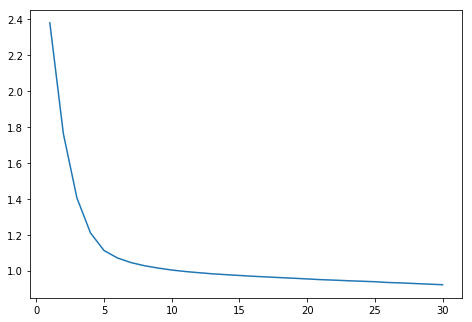

In [24]:
tf.reset_default_graph()

with tf.name_scope('Initialize'):
    X, y = create_placeholders()
    training = tf.placeholder(tf.bool, shape=(), name='training')
    
with tf.name_scope('ForwardPropagation'):
    AL = forward_propagation(X, training)
    
with tf.name_scope('CostFunction'):
    cost = cost_function(AL, ytrain)
    
with tf.name_scope('BackPropagation'):
    optimizer = tf.train.AdamOptimizer(learning_rate=0.005).minimize(cost)
    
init = tf.global_variables_initializer()

cost_summary = tf.summary.scalar('Cost', cost)
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

costs = []

with tf.Session() as sess:
    sess.run(init)
    mini_batches = bf.initialize_mini_batch(Xtrain, ytrain, batchsize=64)
    
    for i in range(300):
        for batch in mini_batches:
            (Xbatch, ybatch) = batch
            sess.run(optimizer, feed_dict={X: Xbatch, y: ybatch, training: True})
            
        if (i % 10 == 0):
            cost_str = cost_summary.eval(feed_dict={X: Xbatch, y: ybatch, training: True})
            costeval = cost.eval(feed_dict={X: Xbatch, y: ybatch, training: True}) #this line is being repeated
            costs.append(costeval)
            print("Iteration: {} Cost: {}".format(i, costeval))
            
            file_writer.add_summary(cost_str, i)
            
    
    saver = tf.train.Saver()
    saver.save(sess, cwd + '/tf_logs/session/session.chkp')
    file_writer.close()
    
bf.single_plot(costs, log=False)

In [25]:
def calculate_accuracy(y, AL):
    ALVals = AL.argmax(axis=1) - 4
    yVals = y.argmax(axis=1) - 4
    
    accurate = np.sum(yVals == ALVals)
    accuracy = accurate/yVals.shape[0]
    print("Accuracy: " + str(accuracy))
    print("Accuracy if all zero predicted:" + str(np.sum(yVals == 0)/yVals.shape[0]))
    
    print("\nValues and their occurance:")
    
    for i in range(-4,5):
        print("Number: " + str(i))
        print("Occurance in Data:" +  str(np.sum(yVals == i)))
        print("Occurance in Prediction:" +  str(np.sum(ALVals == i)))
        print()

In [26]:
with tf.Session() as sess:
    saver = tf.train.Saver()
    saver.restore(sess, cwd + '/tf_logs/session/session.chkp')
    
    Z = sess.run(AL, feed_dict={X: Xtrain, training: False})
    ALast = tf.nn.softmax(Z).eval()
    
    calculate_accuracy(ytrain, ALast)

INFO:tensorflow:Restoring parameters from C:\Users\User\Desktop\Dissertation\CryptoPredictor\CryptoPredictor/tf_logs/session/session.chkp
Accuracy: 0.6626586506346025
Accuracy if all zero predicted:0.7227788911155645

Values and their occurance:
Number: -4
Occurance in Data:14
Occurance in Prediction:0

Number: -3
Occurance in Data:22
Occurance in Prediction:0

Number: -2
Occurance in Data:66
Occurance in Prediction:0

Number: -1
Occurance in Data:75
Occurance in Prediction:1

Number: 0
Occurance in Data:1082
Occurance in Prediction:1332

Number: 1
Occurance in Data:124
Occurance in Prediction:161

Number: 2
Occurance in Data:83
Occurance in Prediction:1

Number: 3
Occurance in Data:28
Occurance in Prediction:2

Number: 4
Occurance in Data:3
Occurance in Prediction:0



In [11]:
#Backtest. Dimension reduction. fix the issues with cost then calculate accuracy in longer data.  Then twitter, reddit.